In [1]:
from logparse import ErddapLogParser

# Instantiate parser and set verbosity

(False to disable print messages)

In [2]:
parser = ErddapLogParser()
parser.verbose=True

### set path to apache and/or nginx files

In [3]:
apache_logs_dir = "../track-visitors/erddap/apache_test_logs/"
nginx_logs_dir = "../track-visitors/erddap/nginx_test_logs/"

### load log files

Can call just apache or just nginx as needed

In [4]:
parser.load_apache_logs(apache_logs_dir)
parser.load_nginx_logs(nginx_logs_dir)


loaded 6792 log lines from ../track-visitors/erddap/apache_test_logs/
DataFrame now has 6400 lines
loaded 115968 log lines from ../track-visitors/erddap/nginx_test_logs/
DataFrame now has 121235 lines


**optional** subset datasetframe to desired number of rows, evenly spaced. Useful for tuning/testing

In [5]:
parser.subset_df(rows=1000) 

starting from DataFrame with 121235 lines. Subsetting by a factor of 121
resetting number of original total requests to match subset DataFrame
DataFrame now has 1002 lines


In [6]:
parser.filter_non_erddap()
parser.filter_spam()
parser.filter_locales()
parser.filter_user_agents()
parser.filter_files()
parser.filter_common_strings()

Filter non erddap dropped 33 lines. Length of dataset is now 96 % of original
Filter spam dropped 9 lines. Length of dataset is now 95 % of original
Filter locales dropped 0 lines. Length of dataset is now 95 % of original
Filter user agents dropped 814 lines. Length of dataset is now 14 % of original
Filter files dropped 21 lines. Length of dataset is now 12 % of original
Filter common strings dropped 22 lines. Length of dataset is now 10 % of original


# get info on ip addresses

In [7]:
parser.get_ip_info()
parser.filter_organisations()


found 18 unique visitors
We have info on 1961 ip address
Filter organisations dropped 1 lines. Length of dataset is now 10 % of original


# Plots and stuff

very early work. These will be added as secondary functions, not in the main Class

In [8]:
import numpy as np
import polars as pl
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
df = parser.df
df = df.with_columns(pl.col("country").fill_null("unknown"))

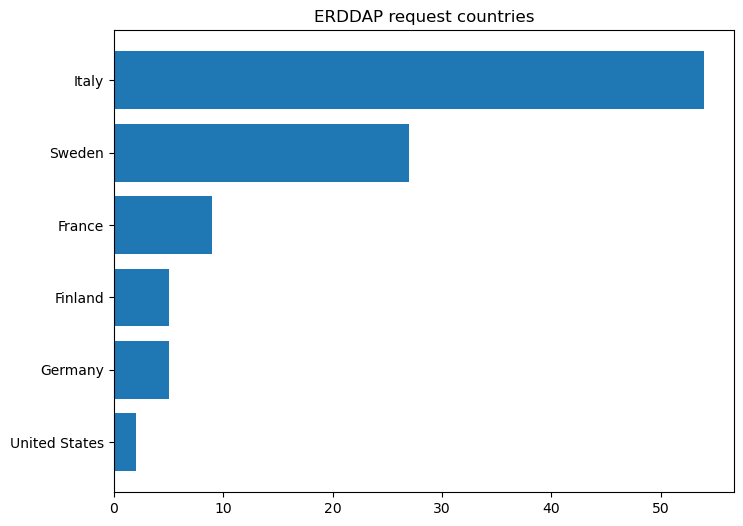

In [10]:

page_counts = Counter(df['country'].to_list()).most_common()
df_count = pd.DataFrame.from_dict(page_counts[:10])
df_count = df_count.rename({0: "page", 1: "counts"}, axis=1)
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(df_count.page, df_count.counts)
ax.set_title("ERDDAP request countries")
ax.invert_yaxis()

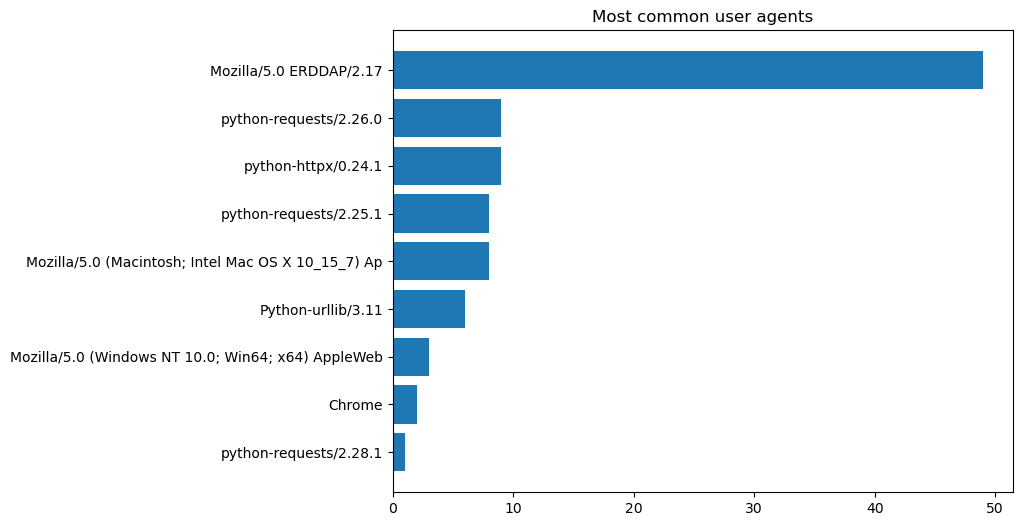

In [13]:
page_counts = Counter(df['user-agent'].to_list()).most_common()
df_count = pd.DataFrame.from_dict(page_counts[:10])
df_count = df_count.rename({0: "page", 1: "counts"}, axis=1)
df_count['page'] = df_count.page.str[:50]
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(df_count.page, df_count.counts)
ax.set_title("Most common user agents")
ax.invert_yaxis()

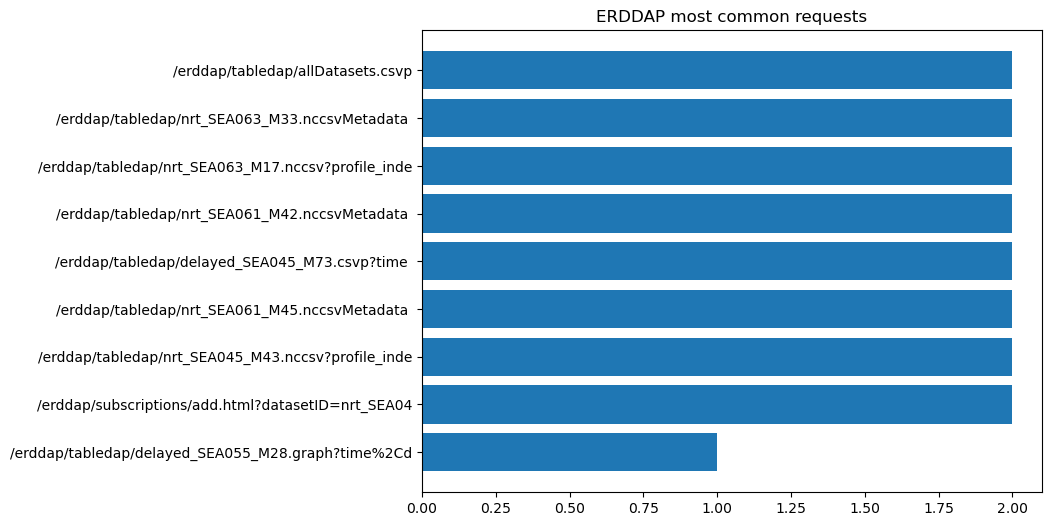

In [12]:
page_counts = Counter(df['url'].to_list()).most_common()
df_count = pd.DataFrame.from_dict(page_counts[:10])
df_count = df_count.rename({0: "page", 1: "counts"}, axis=1)
df_count['page'] = df_count.page.str[:50]
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(df_count.page, df_count.counts)
ax.set_title("ERDDAP most common requests")
ax.invert_yaxis()